In [7]:
from scipy.interpolate import interp1d
import filters
from filters import filterB, filterV, filterR, filterP
from contamination import Star, TransitObject, Planet, Transit, StarConfiguration, LightCurve
import numpy as np
from scipy import integrate, signal
from PyAstronomy import funcFit, pyasl
from pytransit import QuadraticModel
from platosim.simulation import Simulation
from platosim import simfile
import os
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
from sciencetools import fitting
import scipy.stats as stats
home = os.environ["PLATO_WORKDIR"] + "/"
from scipy.special import gamma, factorial
import glob

In [8]:
import filters

In [9]:
path = glob.glob('plato_bandpass.txt')[0]
plato_bandpass = np.loadtxt(path,dtype=float)

In [10]:
plato_bandpass[:,0]

array([ 500.,  550.,  600.,  650.,  700.,  750.,  800.,  850.,  900.,
        950., 1000.])

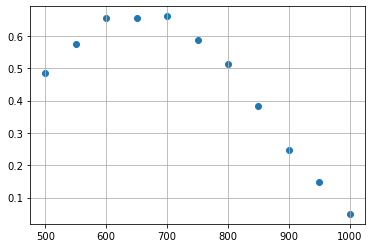

In [11]:
fig, ax = plt.subplots(1,1)
ax.scatter(plato_bandpass[:,0] , plato_bandpass[:,1])
ax.grid()


In [12]:
plato_bandpass_spline = interp1d(plato_bandpass[:,0], plato_bandpass[:,1])

Text(0.5, 1.0, 'PLATO Bandpass')

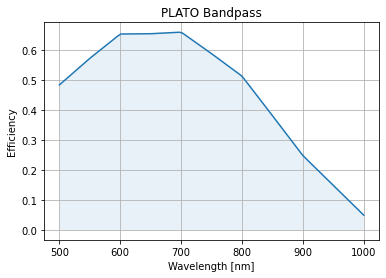

In [13]:
fig, ax = plt.subplots(1,1)
X = np.linspace(500,1000 , 100)
Y = plato_bandpass_spline(X)
section = np.arange(-1, 1, 1/20.)
ax.fill_between(X,Y, alpha = 0.1)
ax.plot(X,Y)
ax.grid()
ax.set_xlabel("Wavelength [nm]")
ax.set_ylabel("Efficiency")
ax.set_title("PLATO Bandpass")

In [14]:
def tBlue(wav):
    if wav > 500 and wav <= 600:
        return 0.0014*(wav-500) + 0.58
    elif wav > 600 and wav <= 700:
        return 0.72
    else:
        return 0.0000001


def tVisual(wav):
    if wav > 350 and wav <= 400:
        return (wav-350)/50
    elif wav > 400 and wav <= 660:
        return 1
    elif wav > 660 and wav < 700:
        return 1 + (660-wav)/40
    else:
        return 0.0000001


def tRed(wav):
    
    def rico(pointA , pointB):
        return ( pointB[1] - pointA[1] ) / ( pointB[0] - pointA[0] )
    def vertDist(pointA, pointB):
        a = rico(pointA, pointB)
        return  - a * pointA[0] + pointA[1]
    
    if wav < 655:
        return 0.0000001
    if wav >= 655 and wav <= 700:
        return 0.70
    
    if wav > 700 and wav <= 800:
        point1 = [700, 0.7]
        point2 = [800, 0.55]
        a = rico(point1,point2) 
        b = vertDist(point1,point2)
        
        return a*wav + b
    
    if wav > 800 and wav <= 950:
        point1 = [800, 0.55]
        point2 = [950, 0.17]
        a = rico(point1,point2) 
        b = vertDist(point1,point2)
        
        return a*wav + b
    
    if wav > 950 and wav <= 1030:
        point1 = [950, 0.17]
        point2 = [1000, 0.08]
        a = rico(point1,point2) 
        b = vertDist(point1,point2)
        
        return a*wav + b
    
    if wav > 1030:
        return 0.0000001

Text(0.5, 1.0, 'Bandpasses')

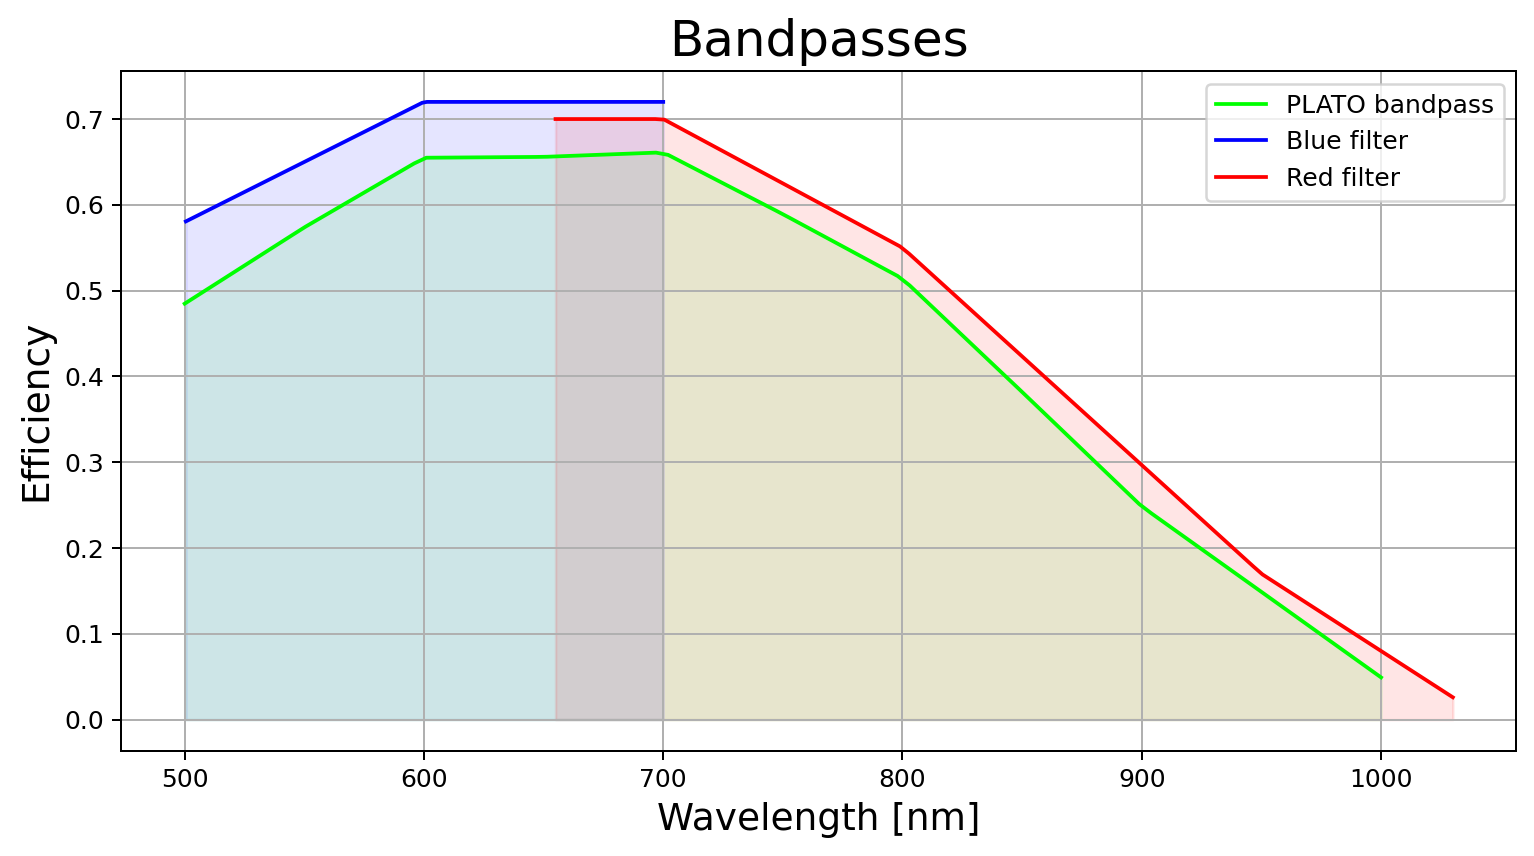

In [20]:
fig, ax = plt.subplots(1,1,figsize=(10,5),dpi=180)
XP = np.linspace(500,1000 , 100)
YP = plato_bandpass_spline(X)
section = np.arange(-1, 1, 1/20.)
ax.fill_between(XP,YP, alpha = 0.1, color = 'lime')
ax.plot(XP,YP, label = 'PLATO bandpass', color = 'lime')
ax.grid()
ax.set_xlabel("Wavelength [nm]", fontsize=15)
ax.set_ylabel("Efficiency",fontsize=15)

XB = np.linspace(500.5,700,100)
YB = [tBlue(x) for x in XB]
ax.fill_between(XB,YB, alpha = 0.1, color = 'blue')
ax.plot(XB,YB, color = 'blue', label = 'Blue filter')


XR = np.linspace(655,1030,100)
YR = [tRed(x) for x in XR]
ax.fill_between(XR,YR, alpha = 0.1, color='red')
ax.plot(XR,YR,color='red', label = 'Red filter')

ax.legend()




ax.set_title("Bandpasses",fontsize=20)